# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [ ]:
df = pd.read_excel('/content/personality.xlsx')


In [ ]:
df

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Stin,0,0,0,182,0
1,Clarence,0,0,0,83,0
2,vivi,0,0,0,74,0
3,josephine,1,1,1,664,1
4,jasmin,1,1,0,590,1
5,kelly,0,0,1,80,0
6,anjel,1,1,1,289,1
7,jonah,1,1,1,894,1
8,aaron,0,1,1,457,1
9,francis,0,0,0,111,0


In [ ]:
df.drop(columns='Name', inplace=True)
df.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,0,0,0,182,0
1,0,0,0,83,0
2,0,0,0,74,0
3,1,1,1,664,1
4,1,1,0,590,1


1. Display the summary of all the features of the dataset using `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       50 non-null     int64
 1   Active in social media?      50 non-null     int64
 2   Replies to comments?         50 non-null     int64
 3   Number of friends/followers  50 non-null     int64
 4   Personality                  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


2. Display the total number of samples from each label using `.value_counts()`

In [ ]:
df['Personality'].value_counts()

,count
Personality,
0,25
1,25


## C. Split the dataset into training and test set

In [ ]:
X = df.drop(columns=['Personality']).values
y = df['Personality'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33, 4)
(33,)
(17, 4)
(17,)


3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
# put your answer here

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:
# put your answer here

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [ ]:
# put your answer here

## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)


7. Train the model using the `.fit()`

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

8. Test the model using the `.predict()`

In [ ]:
y_pred = knn.predict(X_test)


## Evaluate the model

9. Create a confusion matrix

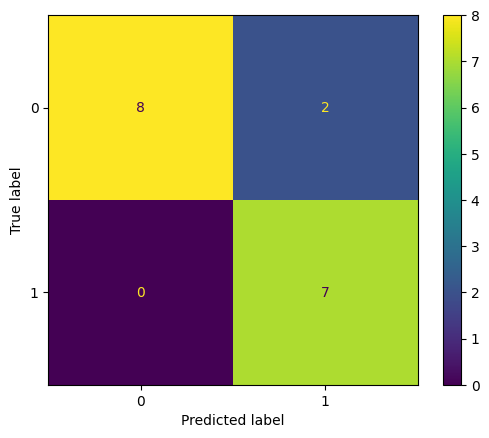

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [ ]:
metrics.accuracy_score(y_test, y_pred)


0.8823529411764706

11. Display the precision

In [ ]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.8 1. ]


12. Display the recall

In [ ]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.         0.77777778]


13. Display the f1-score

In [ ]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.88888889 0.875     ]


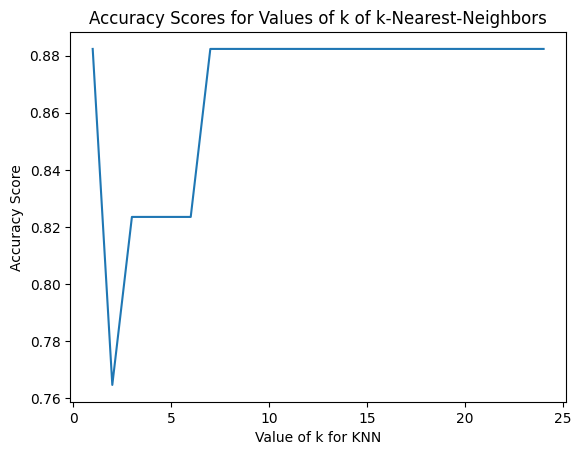

In [ ]:
k_range = list(range(1,25))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
knn.predict([[0,1,0,700]])

array([1])